In [ ]:
import numpy as np
import pandas as pd


# 1. Data Collection

In [ ]:
data = pd.read_csv("/content/cancer_cell.csv")

In [ ]:
len(data.index), len(data.columns)

(569, 33)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 2. Exploring Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.isna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
data = data.dropna(axis='columns')

In [ ]:
data.describe(include="O")

,diagnosis
count,569
unique,2
top,B
freq,357


In [ ]:
data.diagnosis.value_counts()

,count
diagnosis,
B,357
M,212


using value_counts method we can see number of unique values in categorical type of feature.


# 3. Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

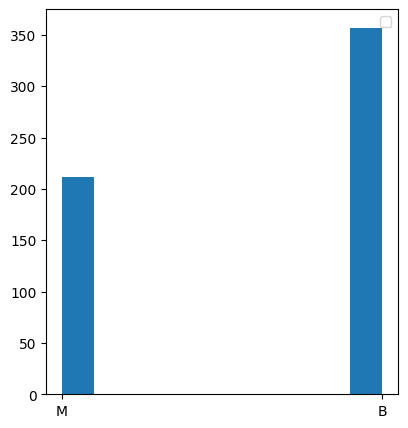

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist( data.diagnosis)
plt.legend()

Now, we have one categorical feature, so we need to convert it into numeric values using LabelEncoder from sklearn.preprocessing packages

In [ ]:
from sklearn.preprocessing import LabelEncoder
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
labelencoder_Y = LabelEncoder()
data.diagnosis = labelencoder_Y.fit_transform(data.diagnosis)

In [ ]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
print(data.diagnosis.value_counts())
print("\n", data.diagnosis.value_counts().sum())

diagnosis
0    357
1    212
Name: count, dtype: int64

 569


11


<Axes: >

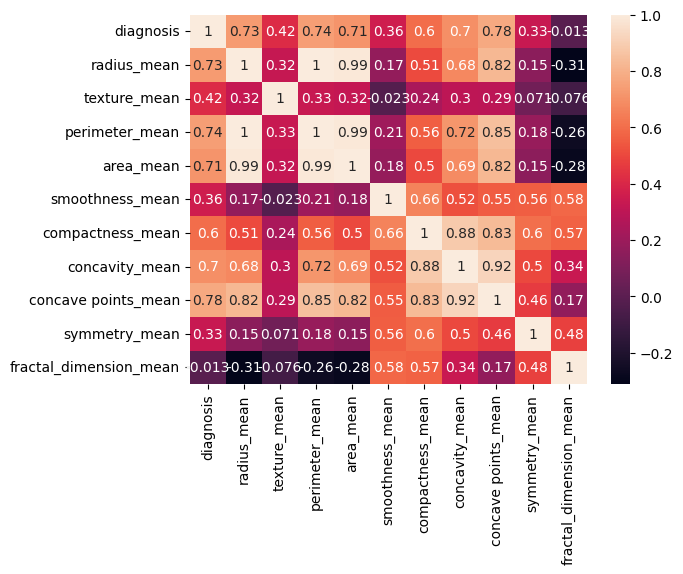

In [ ]:
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
print(len(cols))
data[cols].corr()
sns.heatmap(data[cols].corr(), annot=True)

# 4.Preprocessing and model selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold

In [ ]:
# X should be a DataFrame containing the features you want to use
X = data[["radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']]
# y should be a Series containing the target variable
y = data['diagnosis']
# Now you can split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Scale the data to keep all the values in the same magnitude of 0 -1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Now, we are ready to build our model for prediction, for the I made function for model building and preforming prediction and measure it's prediction and accuracy score.

In [ ]:
def model_building(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)
    cm = confusion_matrix(y_test, predictions)
    return (score, accuracy, predictions)

In [ ]:
models_list = {
    "LogisticRegression" :  LogisticRegression(),
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "KNeighborsClassifier" :  KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "SVC" :  SVC(),
}

In [ ]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):

    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )

    print("\n\nClassification Report of '"+ str(name), "'\n")
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])

    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))


df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)



Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        89
           1       0.91      0.89      0.90        54

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        89
           1       0.92      0.85      0.88        54

    accuracy                           0.92       143
   macro avg       0.92      0.90      0.91       143
weighted avg       0.92      0.92      0.92       143



Classification Report of 'KNeighborsClassifier '

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        89
           1       0.94      0.91      0.92        54

    accuracy              

In [ ]:
df_pred

,model_name,score,accuracy_score,accuracy_percentage
0,LogisticRegression,0.915493,0.923077,92.31%
1,RandomForestClassifier,0.995305,0.916084,91.61%
2,KNeighborsClassifier,0.931925,0.944056,94.41%
3,SVC,0.913146,0.937063,93.71%


In [ ]:
df_pred.sort_values('accuracy_score', ascending=False)

,model_name,score,accuracy_score,accuracy_percentage
2,KNeighborsClassifier,0.931925,0.944056,94.41%
3,SVC,0.913146,0.937063,93.71%
0,LogisticRegression,0.915493,0.923077,92.31%
1,RandomForestClassifier,0.995305,0.916084,91.61%


In [ ]:
def cross_val_scorring(model):
    X = data[["radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']]

    y = data['diagnosis']
    model.fit(X, y)

    # score = model.score(X_train, y_train)

    predictions = model.predict(X)
    accuracy = accuracy_score(predictions,y)
    print("\nFull-Data Accuracy:", round(accuracy, 2))
    print("Cross Validation Score of'"+ str(name), "'\n")


    # Initialize K folds.
    kFold = KFold(n_splits=5) # define 5 diffrent data folds
    err = []

    for train_index, test_index in kFold.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)

        # Data Spliting via fold indexes
        X_train = X.iloc[train_index, :] # train_index = rows and all columns for Prediction_features
        y_train = y.iloc[train_index] # all targeted features trains

        X_test = X.iloc[test_index, :] # testing all rows and cols
        y_test = y.iloc[test_index] # all targeted tests
        # Again Model Fitting
        model.fit(X_train, y_train)
        err.append(model.score(X_train, y_train))
        print("Score:", round(np.mean(err),  2) )
    return (err)

In [ ]:
for name, model in zip(list(models_list.keys()), list(models_list.values())):
    cross_val_scorring(model)


Full-Data Accuracy: 0.9
Cross Validation Score of'LogisticRegression '

Score: 0.91
Score: 0.91
Score: 0.9
Score: 0.9
Score: 0.9

Full-Data Accuracy: 1.0
Cross Validation Score of'RandomForestClassifier '

Score: 0.99
Score: 0.99
Score: 0.99
Score: 1.0
Score: 1.0

Full-Data Accuracy: 0.91
Cross Validation Score of'KNeighborsClassifier '

Score: 0.93
Score: 0.92
Score: 0.91
Score: 0.91
Score: 0.91

Full-Data Accuracy: 0.89
Cross Validation Score of'SVC '

Score: 0.9
Score: 0.89
Score: 0.88
Score: 0.88
Score: 0.88


In [ ]:
from  sklearn.model_selection import GridSearchCV

# 5. Hyperparameter Tunning

For HyperTunning we can use GridSearchCV to know the best performing parameters

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid

In [ ]:
model = KNeighborsClassifier()


# Tunning Params
param_grid = {
    'n_neighbors': list(range(1, 30)),
    'leaf_size': list(range(1,30)),
    'weights': [ 'distance', 'uniform' ]
}


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10)
# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9202104097452934

 Best Estinator is 
KNeighborsClassifier(leaf_size=1, n_neighbors=16)

 Best Parametes are
{'leaf_size': 1, 'n_neighbors': 16, 'weights': 'uniform'}


In [ ]:
# Pick the model
model = SVC()


# Tunning Params
param_grid = [
              {'C': [1, 10, 100, 1000],
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000],
               'gamma': [0.001, 0.0001],
               'kernel': ['rbf']
              }
]
# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9153377630121817

 Best Estinator is 
SVC(C=10, gamma=0.001)

 Best Parametes are
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
# Pick the model
model = RandomForestClassifier()


# Tunning Params
random_grid = {'bootstrap': [True, False],
 'max_depth': [40, 50, None], # 10, 20, 30, 60, 70, 100,
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2], # , 4
 'min_samples_split': [2, 5], # , 10
 'n_estimators': [200, 400]} # , 600, 800, 1000, 1200, 1400, 1600, 1800, 2000

# Implement GridSearchCV
gsc = GridSearchCV(model, random_grid, cv=10) # 10 Cross Validation
# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util


 Best Score is 
0.9249169435215947

 Best Estinator is 
RandomForestClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

 Best Parametes are
{'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
model= LogisticRegression()

log_grid={
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
# Implement GridSearchCV
gsc = GridSearchCV(model, log_grid, cv=10) # 10 Cross Validation
# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9131229235880399

 Best Estinator is 
LogisticRegression(C=1)

 Best Parametes are
{'C': 1}


In [ ]:
import pickle
pickle.dump(gsc,open('gsc.pkl','wb'))

In [ ]:
# load model
gsc = pickle.load(open('gsc.pkl','rb'))

# 6. Output

In [ ]:
# Get input from the user
user_input = {
    'radius_mean': float(input('Enter number of radius_mean: ')),
    'perimeter_mean': float(input('Enter perimeter_mean : ')),
    'area_mean': float(input('Enter area_mean: ')),
    'symmetry_mean': float(input('Enter symmetry_mean: ')),
    'compactness_mean': float(input('Enter compactness_mean: ')),
    'concave points_mean': float(input('Enter Insulin concave points_mean: '))
}

# Convert the user input into a DataFrame
user_df = pd.DataFrame([user_input])

# Make a prediction using the trained model
# Use the instance of the VotingClassifier, 'voting_classifier', to predict
user_prediction = gsc.predict(user_df)


if (user_prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

Enter number of radius_mean: 2.45
Enter perimeter_mean : 3.56
Enter area_mean: 1223
Enter symmetry_mean: 23.6
Enter compactness_mean: 34.6
Enter Insulin concave points_mean: 3.5
The Breast Cancer is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
